In [1]:

#r2 = 0.75283, Residual_R = 0.7497040948438123

In [ ]:
X_features.columns

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Recape of simple linear regression

In [3]:
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
# Drop the target variable
X_features = mtcars.drop(['mpg'], axis=1)

# Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
y = mtcars['mpg']

# Split data into trian and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.786   
Dependent Variable: mpg              AIC:                128.9768
Date:               2023-12-15 11:03 BIC:                142.3844
No. Observations:   25               Log-Likelihood:     -53.488 
Df Model:           10               F-statistic:        9.804   
Df Residuals:       14               Prob (F-statistic): 9.89e-05
R-squared:          0.875            Scale:              7.5460  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    -5.5937    30.4913   -0.1835   0.8571   -70.9911   59.8037
cyl      -0.4762     1.1831   -0.4025   0.6934    -3.0137    2.0612
disp      0.0183     0.0209    0.8779   0.3948    -0.0264    0.0630
hp       -0.0095     0.0313   -0.3038   0.7658    -0.0766    0.0576
drat      1.0021     2.2093    0.4536   0.6571    -3.7364    5.7407
wt       -4.8620     2.6004   -1.8698   0.0826   -10.4393    0.7152
qsec      1.8410     1.5070    1.2216   0.2420    -1.3913    5.0732
vs       -1.9372     3.0771   -0.6296   0.5391    -8.5368    4.6625
am        1.0766     2.4830    0.4336   0.6712    -4.2490    6.4022
gear      1.3271     1.7453    0.7604   0.4596    -2.4163    5.0705
carb      0.1471     1.1458    0.1284   0.8996    -2.3103    2.6046
-----------------------------------------------------------------
Omnibus:              2.280        Durbin-Watson:           2.374
Prob(Omnibus):        0.320        Jarque-Bera (JB):        1.965
Skew:                 0.641        Prob(JB):                0.374
Kurtosis:             2.508        Condition No.:           16579
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [3]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [4]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('mpg~wt+vs+am+gear+carb+qsec+cyl+disp+hp+drat',data=mtcars).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.807   
Dependent Variable: mpg              AIC:                161.7098
Date:               2023-10-25 15:43 BIC:                177.8329
No. Observations:   32               Log-Likelihood:     -69.855 
Df Model:           10               F-statistic:        13.93   
Df Residuals:       21               Prob (F-statistic): 3.79e-07
R-squared:          0.869            Scale:              7.0235  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    12.3034   18.7179   0.6573  0.5181  -26.6226  51.2293
wt           -3.7153    1.8944  -1.9612  0.0633   -7.6550   0.2243
vs            0.3178    2.1045   0.1510  0.8814   -4.0588   4.6943
am            2.5202    2.0567   1.2254  0.2340   -1.7568   6.7973
gear          0.6554

In [5]:
#Coefficients
model.params

Intercept    12.303374
wt           -3.715304
vs            0.317763
am            2.520227
gear          0.655413
carb         -0.199419
qsec          0.821041
cyl          -0.111440
disp          0.013335
hp           -0.021482
drat          0.787111
dtype: float64

In [6]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    0.657306
wt          -1.961189
vs           0.150991
am           1.225404
gear         0.438914
carb        -0.240626
qsec         1.123413
cyl         -0.106639
disp         0.746758
hp          -0.986841
drat         0.481304
dtype: float64 
 Intercept    0.518124
wt           0.063252
vs           0.881423
am           0.233990
gear         0.665206
carb         0.812179
qsec         0.273941
cyl          0.916087
disp         0.463489
hp           0.334955
drat         0.635278
dtype: float64


In [7]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8690157644777647, 0.806642318990986)

In [9]:
X_features.corr()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.057534,0.274073,1.000000


In [13]:
model_2 = smf.ols('mpg~wt+vs+am+gear+carb+qsec',data=mtcars).fit()
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.826   
Dependent Variable: mpg              AIC:                155.9848
Date:               2023-10-25 15:59 BIC:                166.2449
No. Observations:   32               Log-Likelihood:     -70.992 
Df Model:           6                F-statistic:        25.46   
Df Residuals:       25               Prob (F-statistic): 1.66e-09
R-squared:          0.859            Scale:              6.3345  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     11.0050    9.8636   1.1157  0.2752  -9.3094  31.3193
wt            -3.1389    1.0100  -3.1077  0.0047  -5.2191  -1.0587
vs             0.0350    1.8261   0.0192  0.9849  -3.7259   3.7959
am             2.8836    1.8060   1.5967  0.1229  -0.8358   6.6031
gear           0.853

In [15]:
X_features.dtypes

cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

array([[<Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>,
        <Axes: xlabel='wt', ylabel='cyl'>,
        <Axes: xlabel='qsec', ylabel='cyl'>,
        <Axes: xlabel='vs', ylabel='cyl'>,
        <Axes: xlabel='am', ylabel='cyl'>,
        <Axes: xlabel='gear', ylabel='cyl'>,
        <Axes: xlabel='carb', ylabel='cyl'>],
       [<Axes: xlabel='cyl', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='drat', ylabel='disp'>,
        <Axes: xlabel='wt', ylabel='disp'>,
        <Axes: xlabel='qsec', ylabel='disp'>,
        <Axes: xlabel='vs', ylabel='disp'>,
        <Axes: xlabel='am', ylabel='disp'>,
        <Axes: xlabel='gear', ylabel='disp'>,
        <Axes: xlabel='carb', ylabel='disp'>],
       [<Axes: xlabel='cyl', ylabel='hp'>,
        <Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlab

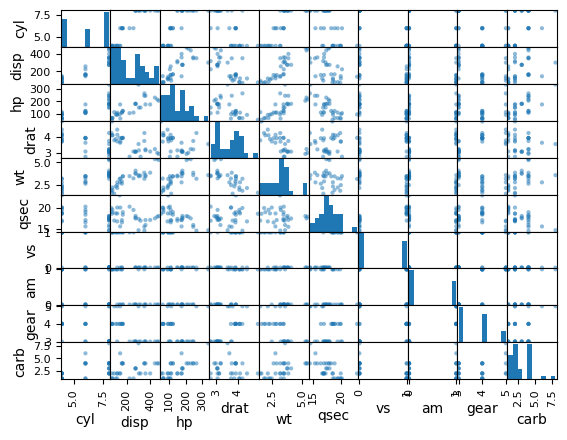

In [4]:
from pandas import plotting
plotting.scatter_matrix(X_features)

<Axes: >

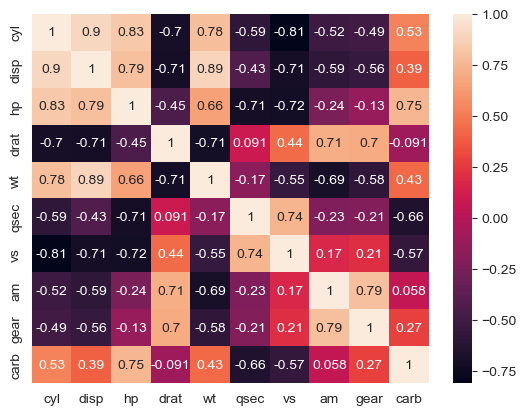

In [7]:
sns.heatmap(X_features.corr(),annot=True)

C:\ProgramData\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


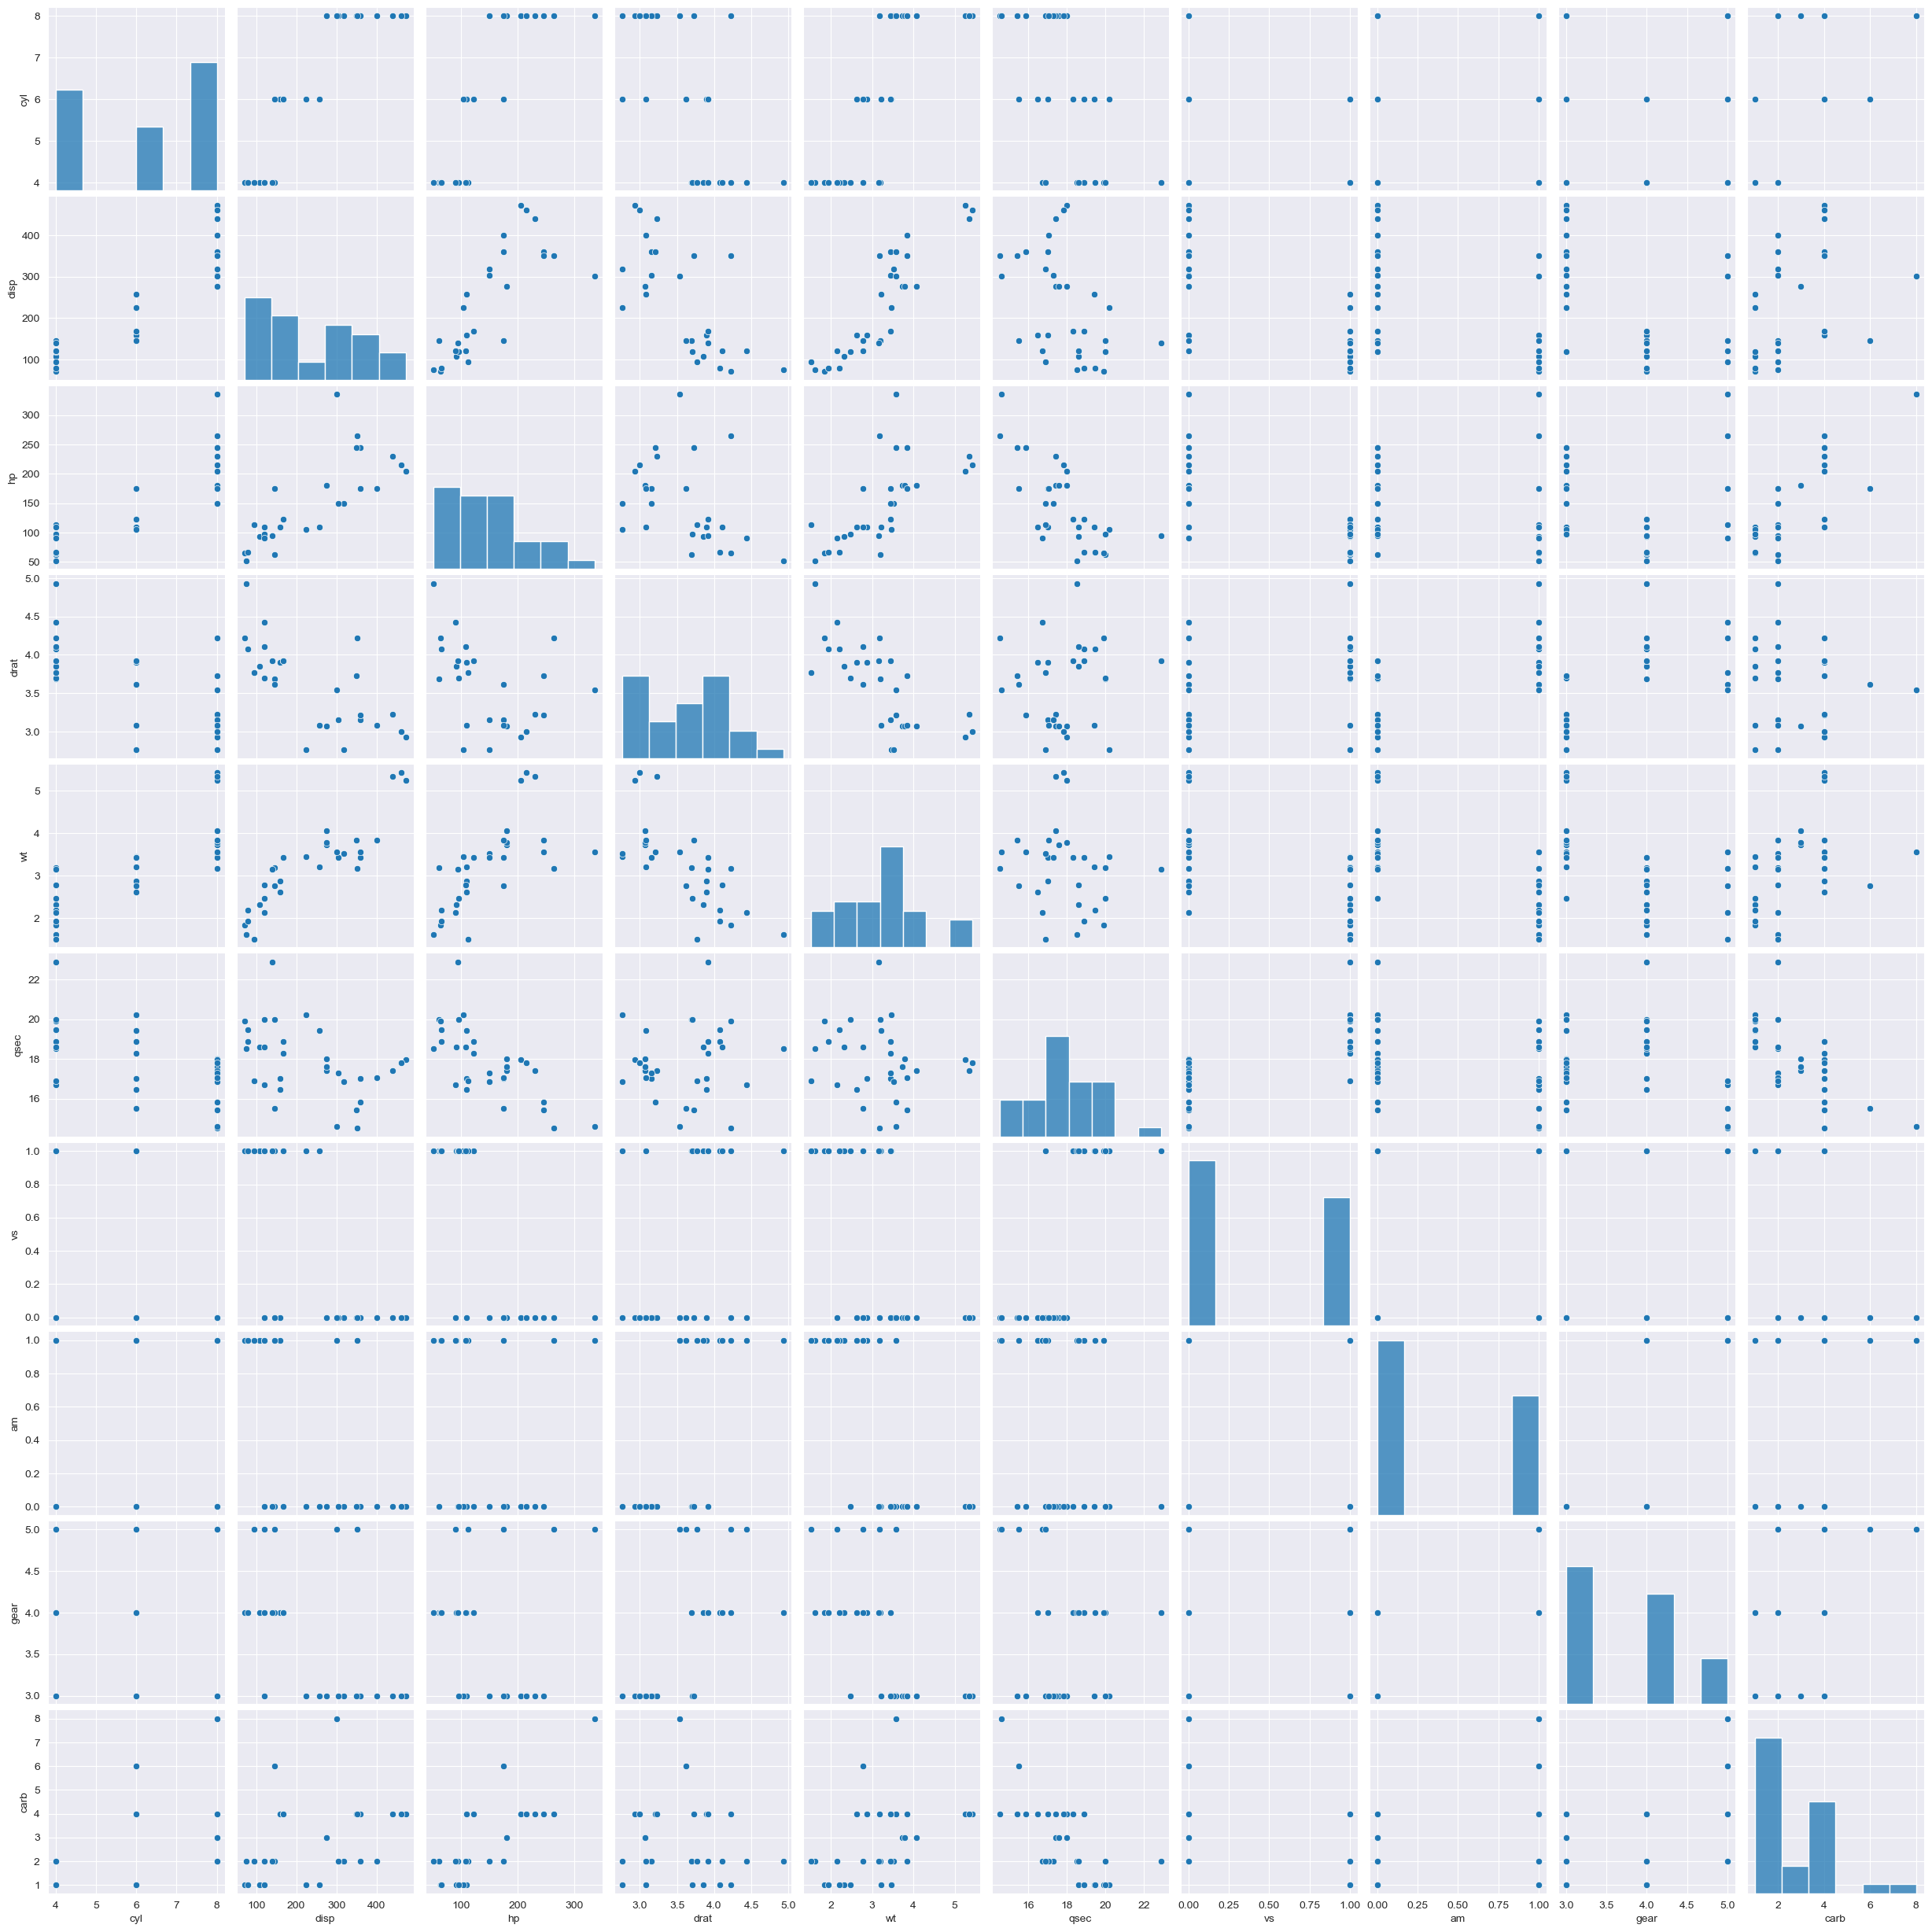

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(X_features)

In [ ]:
1. Co-efficient of Determination (R-Square) and Adjusted R-Square:
    
Observation: For our model , the R-square value is 0.875 and the adjusted R-square value is 0.786.
This shows that the model explains 78.6% of the variation in dependent variable.


After Dignosis:
Features removed: Cyl, disp,hp, drat.
the R-square value is 0.859 and the adjusted R-square value is 0.82
This shows that the model explains 82.1% of the variation in dependent variable.
        

In [ ]:
2. Hypothesis Test for the Regression Co-efficients (t-Test):
    
Observation: The p-value for the t-test of all the features except wt is above 0.05.
This indicates that there is  not statistically significant relationship 
(at significance value of 0.05) between these features and mpg (dependent variable).    


In [ ]:
3. Test for Overall Model: Analysis of Variance (F-test):
        
Observation: The probability value of F-statistic of the model is 9.89e-05 (<0.05) 
which indicates that the overall model is statistically significant

# 4. Multi-collinearity and Variance Inflation Factor:

In [ ]:
'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [24]:
calc_vif(X)

,variables,VIF
0,const,1596.273030
1,cyl,15.373833
2,disp,21.620241
3,hp,9.832037
4,drat,3.374620
5,wt,15.164887
6,qsec,7.527958
7,vs,4.965873
8,am,4.648487
9,gear,5.357452


In [24]:
Z = X.iloc[:]
z = calc_vif(Z)
z.VIF

0     1596.273030
1       15.373833
2       21.620241
3        9.832037
4        3.374620
5       15.164887
6        7.527958
7        4.965873
8        4.648487
9        5.357452
10       7.908747
Name: VIF, dtype: float64

#  Model selection

# Akaike Information Criterion
The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting a model.

It is named for the developer of the method, Hirotugu Akaike, and may be shown to have a basis in information theory and frequentist-based inference.

AIC = -2/N * LL + 2 * k/N

Where N is the number of examples in the training dataset, LL is the log-likelihood of the model on the training dataset, and k is the number of parameters in the model.

The score, as defined above, is minimized, e.g. the model with the lowest AIC is selected.

In [25]:
#Build model with Wt
model = smf.ols('mpg~wt+hp',data=mtcars).fit()

f'AIC:{model.aic}'

'AIC:154.6523388256413'

# Bayesian Information Criterion
The Bayesian Information Criterion, or BIC for short, is a method for scoring and selecting a model.

It is named for the field of study from which it was derived: Bayesian probability and inference. Like AIC, it is appropriate for models fit under the maximum likelihood estimation framework.

The BIC statistic is calculated for logistic regression as follows (taken from “The Elements of Statistical Learning“):

BIC = -2 * LL + log(N) * k

Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

The quantity calculated is different from AIC, although can be shown to be proportional to the AIC. Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.

Note that, compared to AIC […], this penalizes model complexity more heavily.

In [27]:
#Build model with Wt
model = smf.ols('mpg~wt+hp',data=mtcars).fit()

f'BIC:{model.bic}'

'BIC:159.04954653404047'

# 5. Residual Analysis to validate model assumptions:

# QQ plot

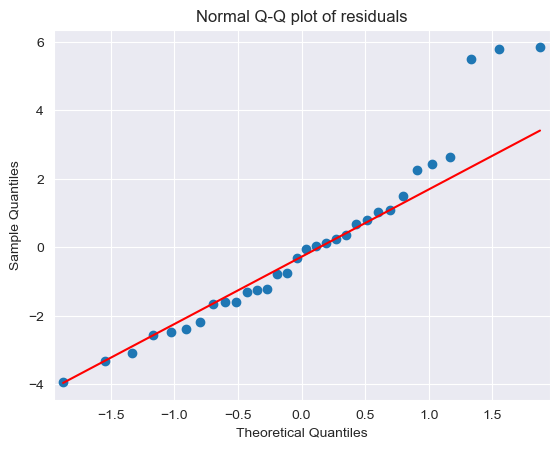

In [26]:

qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# PP plot

<Figure size 800x600 with 0 Axes>

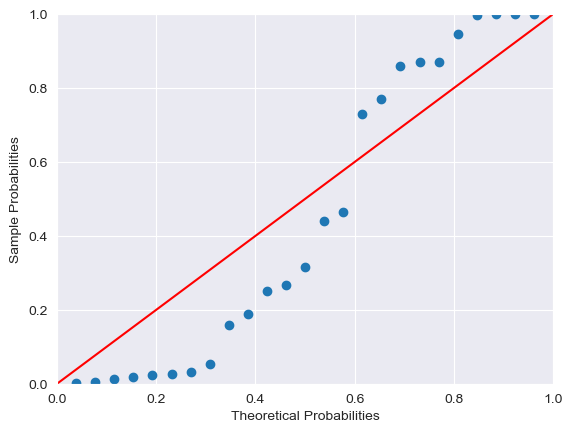

In [27]:
# Test for Normality of Residuals
probplot = sm.ProbPlot(mlr_model.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

# Residual plot

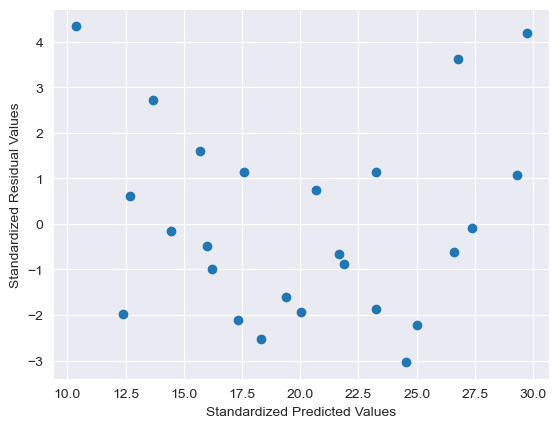

In [28]:
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(mlr_model.fittedvalues, mlr_model.resid)
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

# 6. Outlier Analysis:

In [29]:
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
X_features = mtcars.drop(['mpg'], axis=1)
X = sm.tools.tools.add_constant(X_features)
y = mtcars['mpg']

sm_model = sm.regression.linear_model.OLS(y, X).fit()

influence = sm_model.get_influence()

influence_list = influence.cooks_distance[0]
# print(influence_list)
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = mtcars.index

cooks_df = mtcars.merge(influence_df, left_index=True, right_index=True)
cooks_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,influence
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2.059098e-02
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,9.218355e-03
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,6.352411e-02
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1.306707e-04
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,4.083138e-03
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,3.697080e-02
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,6.907413e-05
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,3.454201e-02
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,3.792206e-01
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,4.282385e-03


In [33]:
len(mtcars)

32

In [30]:
# Settin the threshold and getting the outliers
original_length = len(mtcars)
cooks_threshold = 4/original_length
print(cooks_threshold)
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / original_length * 100}% of our dataset")

0.125
Removed: 4
This is 12.5% of our dataset


In [34]:
cooks_outliers.sort_values(by=["influence"])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,influence
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,0.131687
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0.146126
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0.379221
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,0.713521


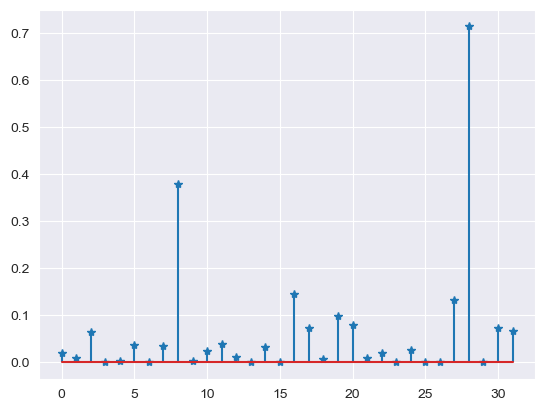

In [31]:
plt.stem(np.arange(len(mtcars)), np.round(influence_list, 3), markerfmt='*')
plt.show()

# Leverage value

In [32]:
p = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", p, " and number of observations:", n)
leverage_cutoff = 3*((p + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3))

Number of variables: 11  and number of observations: 25
Cutoff for leverage value:  1.44


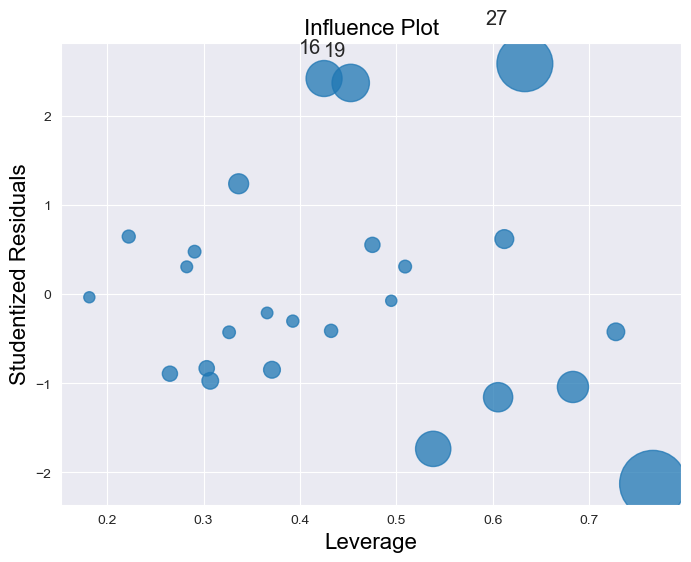

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot( mlr_model, ax = ax )
plt.show()

# Improving model

In [34]:
mtcars_new = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
print(len(mtcars_new))
mtcars1=mtcars_new.drop(mtcars_new.index[[16,8,27,28]],axis=0).reset_index()
#Drop the original index
mtcars1=mtcars1.drop(['index'],axis=1)
print(len(mtcars1))

32
28


In [35]:
X_feature = mtcars1.drop(['mpg'], axis=1)

# Add constant intercept term 1 to dataset
X = sm.add_constant(X_feature)
y = mtcars1['mpg']

# Split data into trian and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=54)

# Fit the regression model
mlr_model_1 = sm.OLS(train_y, train_X).fit()
mlr_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: mpg              AIC:                101.8362
Date:               2023-10-25 16:56 BIC:                113.8376
No. Observations:   22               Log-Likelihood:     -39.918 
Df Model:           10               F-statistic:        19.03   
Df Residuals:       11               Prob (F-statistic): 1.55e-05
R-squared:          0.945            Scale:              4.4114  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const     -82.7349   31.9234  -2.5917  0.0251  -152.9978  -12.4721
cyl         0.4037    1.1491   0.3514  0.7319    -2.1253    2.9328
disp        0.0355    0.0201   1.7695  0.1045    -0.0087    0.0797
hp          0.0380    0.0328   1.1598  0.2707    -0.0341    0.1101
drat        4.0570    2.4627   1.6473  0.1277    -1.3635    9.4774
wt         -7.4444    2.7499  -2.7072  0.0204   -13.4968   -1.3919
qsec        4.1715    1.2960   3.2188  0.0082     1.3190    7.0240
vs         -7.5587    3.7570  -2.0119  0.0694   -15.8277    0.7103
am         -0.7115    2.3844  -0.2984  0.7710    -5.9596    4.5366
gear        8.1897    3.3825   2.4212  0.0339     0.7448   15.6345
carb       -1.4589    1.1985  -1.2172  0.2490    -4.0968    1.1791
-----------------------------------------------------------------
Omnibus:              1.160        Durbin-Watson:           1.381
Prob(Omnibus):        0.560        Jarque-Bera (JB):        0.377
Skew:                 0.304        Prob(JB):                0.828
Kurtosis:             3.201        Condition No.:           21635
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [40]:
influence = mlr_model_1.get_influence()
influence_list1 = influence.cooks_distance[0]
len(influence_list1)
influence_df1 = pd.DataFrame(influence_list1, columns=["influence"])
influence_df1.index =train_X.index
cooks_df = train_X.merge(influence_df1, left_index=True, right_index=True)
cooks_df

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,influence
22,1.0,8,400.0,175,3.08,3.845,17.05,0,0,3,2,0.022096
16,1.0,4,75.7,52,4.93,1.615,18.52,1,1,4,2,0.000588
11,1.0,8,275.8,180,3.07,3.730,17.60,0,0,3,3,0.047371
21,1.0,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0.183917
12,1.0,8,275.8,180,3.07,3.780,18.00,0,0,3,3,0.063095
19,1.0,8,318.0,150,2.76,3.520,16.87,0,0,3,2,0.025601
13,1.0,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0.065464
14,1.0,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0.010821
4,1.0,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.015203
20,1.0,8,304.0,150,3.15,3.435,17.30,0,0,3,2,0.099627


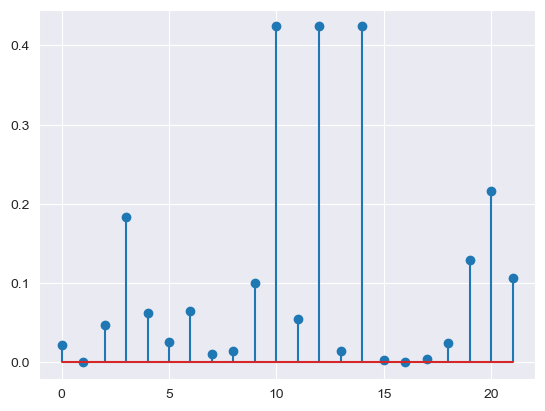

In [41]:
plt.stem(np.arange(len(train_X)), np.round(influence_list1, 3), markerfmt='o')
plt.show()

In [42]:
# Settin the threshold and getting the outliers
original_length = len(mtcars1)
cooks_threshold = 4/original_length
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / original_length * 100}% of our dataset")

Removed: 5
This is 17.857142857142858% of our dataset


In [43]:
import statsmodels.formula.api as smf
# Fit the regression model
mlr_model2 = sm.OLS(train_y, train_X).fit()
mlr_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: mpg              AIC:                101.8362
Date:               2023-10-14 14:49 BIC:                113.8376
No. Observations:   22               Log-Likelihood:     -39.918 
Df Model:           10               F-statistic:        19.03   
Df Residuals:       11               Prob (F-statistic): 1.55e-05
R-squared:          0.945            Scale:              4.4114  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const     -82.7349   31.9234  -2.5917  0.0251  -152.9978  -12.4721
cyl         0.4037    1.1491   0.3514  0.7319    -2.1253    2.9328
disp        0.0355    0.0201   1.7695  0.1045    -0.0087    0.0797
hp          0.0380    0.0328   1.1598  0.2707    -0.0341    0.1101
drat        4.0570    2.4627   1.6473  0.1277    -1.3635    9.4774
wt         -7.4444    2.7499  -2.7072  0.0204   -13.4968   -1.3919
qsec        4.1715    1.2960   3.2188  0.0082     1.3190    7.0240
vs         -7.5587    3.7570  -2.0119  0.0694   -15.8277    0.7103
am         -0.7115    2.3844  -0.2984  0.7710    -5.9596    4.5366
gear        8.1897    3.3825   2.4212  0.0339     0.7448   15.6345
carb       -1.4589    1.1985  -1.2172  0.2490    -4.0968    1.1791
-----------------------------------------------------------------
Omnibus:              1.160        Durbin-Watson:           1.381
Prob(Omnibus):        0.560        Jarque-Bera (JB):        0.377
Skew:                 0.304        Prob(JB):                0.828
Kurtosis:             3.201        Condition No.:           21635
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

# Prediction on testing data

In [44]:
y_pred = mlr_model_1.predict(test_X)
y_pred

26    21.174108
24    35.636874
10    12.066644
8     16.313901
25    21.696491
3     18.241168
dtype: float64

In [ ]:
test_y,test_X

In [45]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': test_y, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
26,15.0,21.174108
24,26.0,35.636874
10,16.4,12.066644
8,19.2,16.313901
25,19.7,21.696491
3,21.4,18.241168


# Accuracy checking

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


mae = metrics.mean_absolute_error(test_y, y_pred)
mse = metrics.mean_squared_error(test_y, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(test_y, y_pred))
# Estimating the accuracy of the model using 'r2 score'
print(r2_score(test_y, y_pred)*100)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

-127.08785550599515
Mean Absolute Error: 4.6976267027172876
Mean Square Error: 28.676780553216798
Root Mean Square Error: 5.35507054605416
